# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from sklearn import datasets


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path, low_memory=False)
study_results = pd.read_csv(study_results_path, low_memory=False)

# Combine the data into a single DataFrame

full_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
full_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [2]:
# Checking the number of mice.
unique = full_df["Mouse ID"].nunique()
unique


249

In [3]:
# Optional: Get all the data for the duplicate mouse ID. 
remove_df = full_df.loc[full_df['Mouse ID']=="g989", :]
remove_df

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [4]:
removed_df_array = remove_df["Mouse ID"].unique()
removed_df_array


array(['g989'], dtype=object)

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = full_df.loc[full_df['Mouse ID']!="g989", :]
clean_df2 = clean_df.copy()

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stats_df= clean_df.groupby(["Drug Regimen"]).agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

stats_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [8]:
mouse = clean_df2.groupby(["Drug Regimen"])["Timepoint"].count()
mouse

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

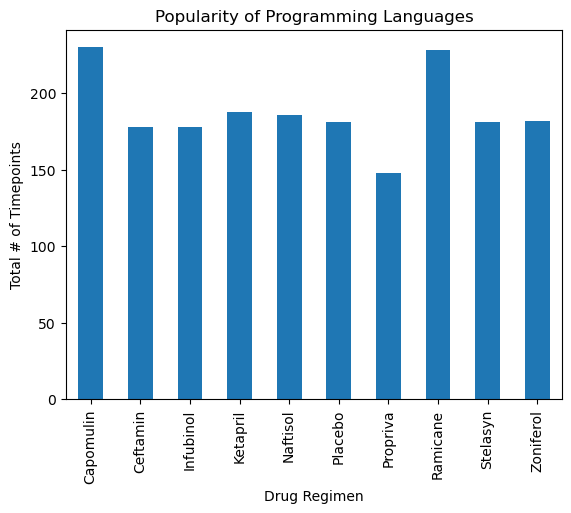

<Figure size 640x480 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mouse.plot(kind="bar")
plt.title("Popularity of Programming Languages")
plt.ylabel("Total # of Timepoints")
plt.show()
plt.tight_layout()

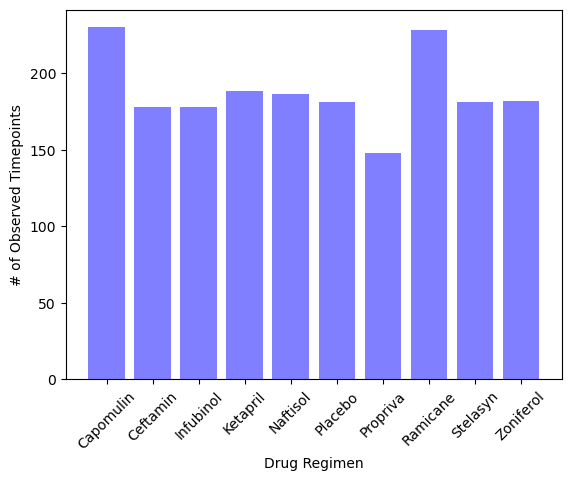

<Figure size 640x480 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Timepoints")

plt.bar(mouse.index, mouse.values, color='b', alpha=0.5, align="center")
plt.xticks(rotation= 45)

plt.show()
plt.tight_layout()

<Axes: ylabel='Sex'>

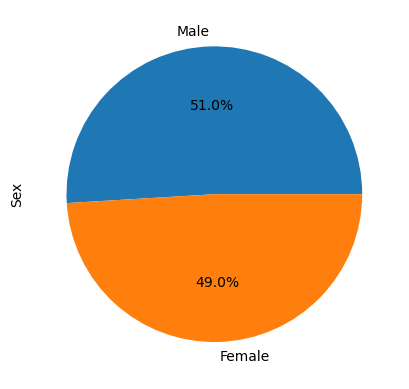

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Sex_df = clean_df2["Sex"].value_counts()
Sex_df.plot.pie(autopct='%1.1f%%')


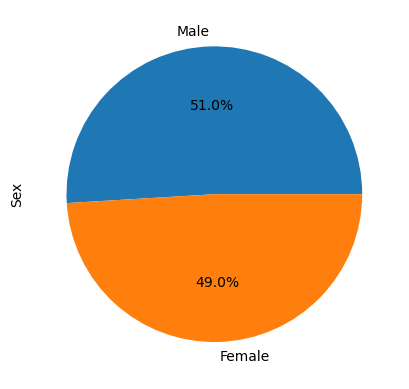

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplo
plt.pie(Sex_df.values, labels=Sex_df.index, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
clean_df2.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_mouse = clean_df2.groupby(["Mouse ID"])["Timepoint"].max()
max_mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_df = pd.merge(max_mouse, clean_df2, on= ["Mouse ID", "Timepoint"], how= "left")
max_df


Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
2       a262         45      Placebo  Female          17          29   
3       a275         45     Ceftamin  Female          20          28   
4       a366         30     Stelasyn  Female          16          29   
..       ...        ...          ...     ...         ...         ...   
243     z435         10     Propriva  Female          12          26   
244     z578         45     Ramicane    Male          11          16   
245     z581         45    Infubinol  Female          24          25   
246     z795         45     Naftisol  Female          13          29   
247     z969         45     Naftisol    Male           9          30   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
2             70.717621                 4  
3             62.999356                 3  
4             63.440686                 1  
..                  ...               ...  
243           48.710661                 0  
244           30.638696                 0  
245           62.754451                 3  
246           65.741070                 3  
247           73.867845                 4  

[248 rows x 8 columns]

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Tumor_data = []

for treatment in treatments:

 # Locate the rows which contain mice on each drug and get the tumor volumes  

    formula = max_df.loc[max_df["Drug Regimen"] == treatment]['Tumor Volume (mm3)']
     # add subset 
    Tumor_data.append(formula)
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 

    quartiles = formula.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq


    # Determine outliers using upper and lower bounds
    lower_bound = formula.loc[formula<(lowerq - (1.5*iqr))]
    upper_bound = formula.loc[formula>(upperq + (1.5*iqr))]
    
    print(f"{treatment} potential outliers {lower_bound} {upper_bound}.")

Capomulin potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64) Series([], Name: Tumor Volume (mm3), dtype: float64).
Ramicane potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64) Series([], Name: Tumor Volume (mm3), dtype: float64).
Infubinol potential outliers 31    36.321346
Name: Tumor Volume (mm3), dtype: float64 Series([], Name: Tumor Volume (mm3), dtype: float64).
Ceftamin potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64) Series([], Name: Tumor Volume (mm3), dtype: float64).


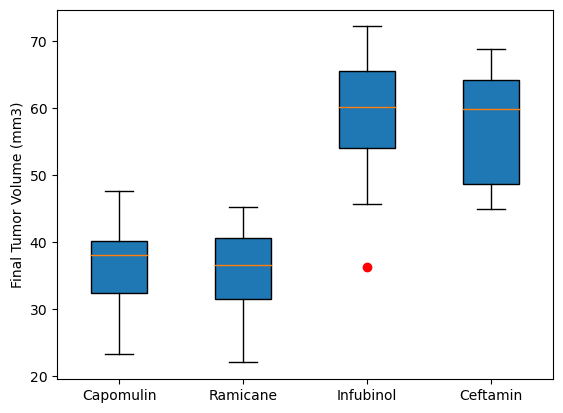

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig = plt.figure()
ax = fig.add_subplot()
r = "red"
ax.boxplot(Tumor_data,labels= treatments, patch_artist=True,
           flierprops=dict(color=r, markerfacecolor= r, markeredgecolor=r))
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

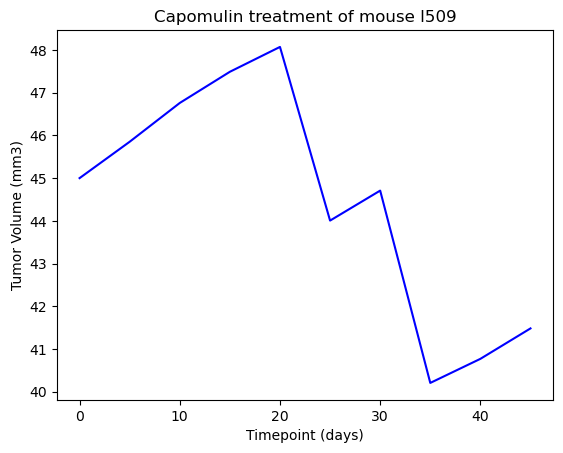

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Specific_df= clean_df.loc[clean_df["Mouse ID"] == "l509",:]

plt.plot(Specific_df["Timepoint"], Specific_df["Tumor Volume (mm3)"] , color="blue")
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.xticks()
plt.ylabel("Tumor Volume (mm3)")
plt.show()

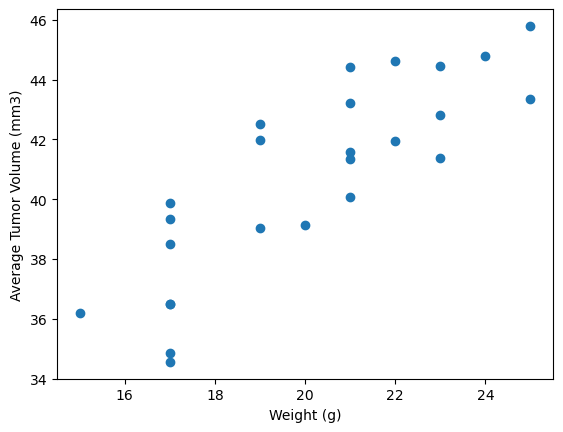

In [25]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

avg_series = Capomulin_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
avg_series

weight_series = Capomulin_df.groupby(["Mouse ID"])["Weight (g)"].mean()
weight_series

plt.scatter(weight_series, avg_series)
plt.xticks()
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


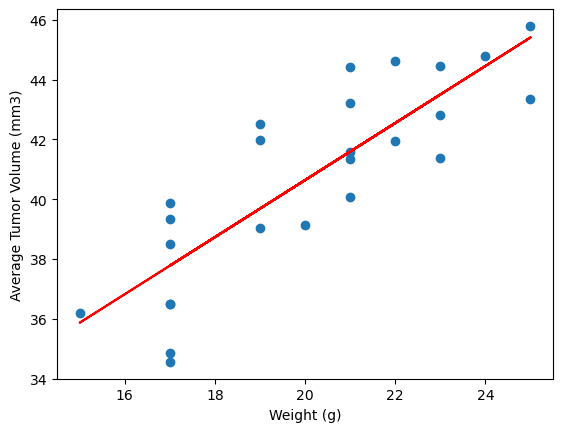

In [29]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = weight_series
y_values = avg_series
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(weight_series, avg_series)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}.")
plt.show()